In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

/u/38/rissans2/unix/miniconda3/envs/digress2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def cosine_beta_schedule(timesteps, s=0.008, raise_to_power: float = 1):
    """
    cosine schedule
    as proposed in https://openreview.net/forum?id=-NEXDKk8gZ
    """
    steps = timesteps + 2
    x = np.linspace(0, steps, steps)
    alphas_cumprod = np.cos(((x / steps) + s) / (1 + s) * np.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    betas = np.clip(betas, a_min=0, a_max=0.999)
    alphas = 1. - betas
    alphas_cumprod = np.cumprod(alphas, axis=0)

    if raise_to_power != 1:
        alphas_cumprod = np.power(alphas_cumprod, raise_to_power)

    return alphas_cumprod

In [3]:
def cosine_beta_schedule_discrete(timesteps, s=0.008):
    """ Cosine schedule as proposed in https://openreview.net/forum?id=-NEXDKk8gZ. """
    steps = timesteps + 2
    x = np.linspace(0, steps, steps)

    alphas_cumprod = np.cos(0.5 * np.pi * ((x / steps) + s) / (1 + s)) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    alphas = (alphas_cumprod[1:] / alphas_cumprod[:-1])
    betas = 1 - alphas
    return betas.squeeze()

In [4]:
def cosine_beta_schedule_discrete_alternate(timesteps):
    """ Cosine schedule as proposed in https://openreview.net/forum?id=-NEXDKk8gZ. """
    steps = timesteps + 2
    x = np.linspace(0, steps, steps)

    # Note that we don't have the s parameter here: It shouldn't be here in discrete diffusion!
    alphas_cumprod = np.cos(0.5 * np.pi * (x / steps)) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    alphas = alphas_cumprod # This allows zero probability for the first step (is important!)
    betas = 1 - alphas
    return betas.squeeze()

In [37]:
def cosine_beta_schedule_discrete_alternate_2(timesteps):
    """ Cosine schedule as proposed in https://openreview.net/forum?id=-NEXDKk8gZ. """
    steps = timesteps + 2
    x = np.linspace(0, steps, steps)

    # Note that we don't have the s parameter here: It shouldn't be here in discrete diffusion!
    alphas_cumprod = np.cos(0.5 * np.pi * (x / steps)) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    alphas = (alphas_cumprod[1:] / alphas_cumprod[:-1])
    alphas = np.concatenate([np.array([1.0]), alphas])
    betas = 1 - alphas
    return betas.squeeze()

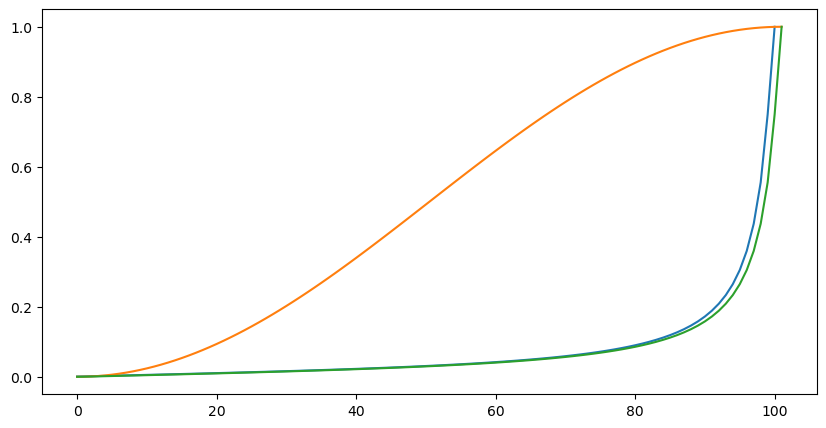

In [39]:
timesteps = 100
plt.figure(figsize=(10, 5))
#plt.plot(cosine_beta_schedule(timesteps, s=0.008))
plt.plot(cosine_beta_schedule_discrete(timesteps, s=0.008))
plt.plot(cosine_beta_schedule_discrete_alternate(timesteps))
plt.plot(cosine_beta_schedule_discrete_alternate_2(timesteps))

In [17]:
cosine_beta_schedule_discrete(timesteps, s=0.008)

array([0.50615641, 1.        ])

In [18]:
cosine_beta_schedule_discrete_alternate(timesteps)

array([0. , 0.5, 1. ])